In [2]:
# load data
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
feature = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
price = raw_df.values[1::2, 2]
print('data size = ', feature.shape)
print('target size = ', price.shape)
'''
from: data_url:
 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
'''
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']


data size =  (506, 13)
target size =  (506,)


In [3]:
# more details of data
df_feature = pd.DataFrame(feature, columns = feature_names)
df_target = pd.DataFrame(price, columns =['MEDV'])
df_boston = pd.concat([df_feature, df_target,], axis = 1)

In [4]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Figure size 640x480 with 0 Axes>

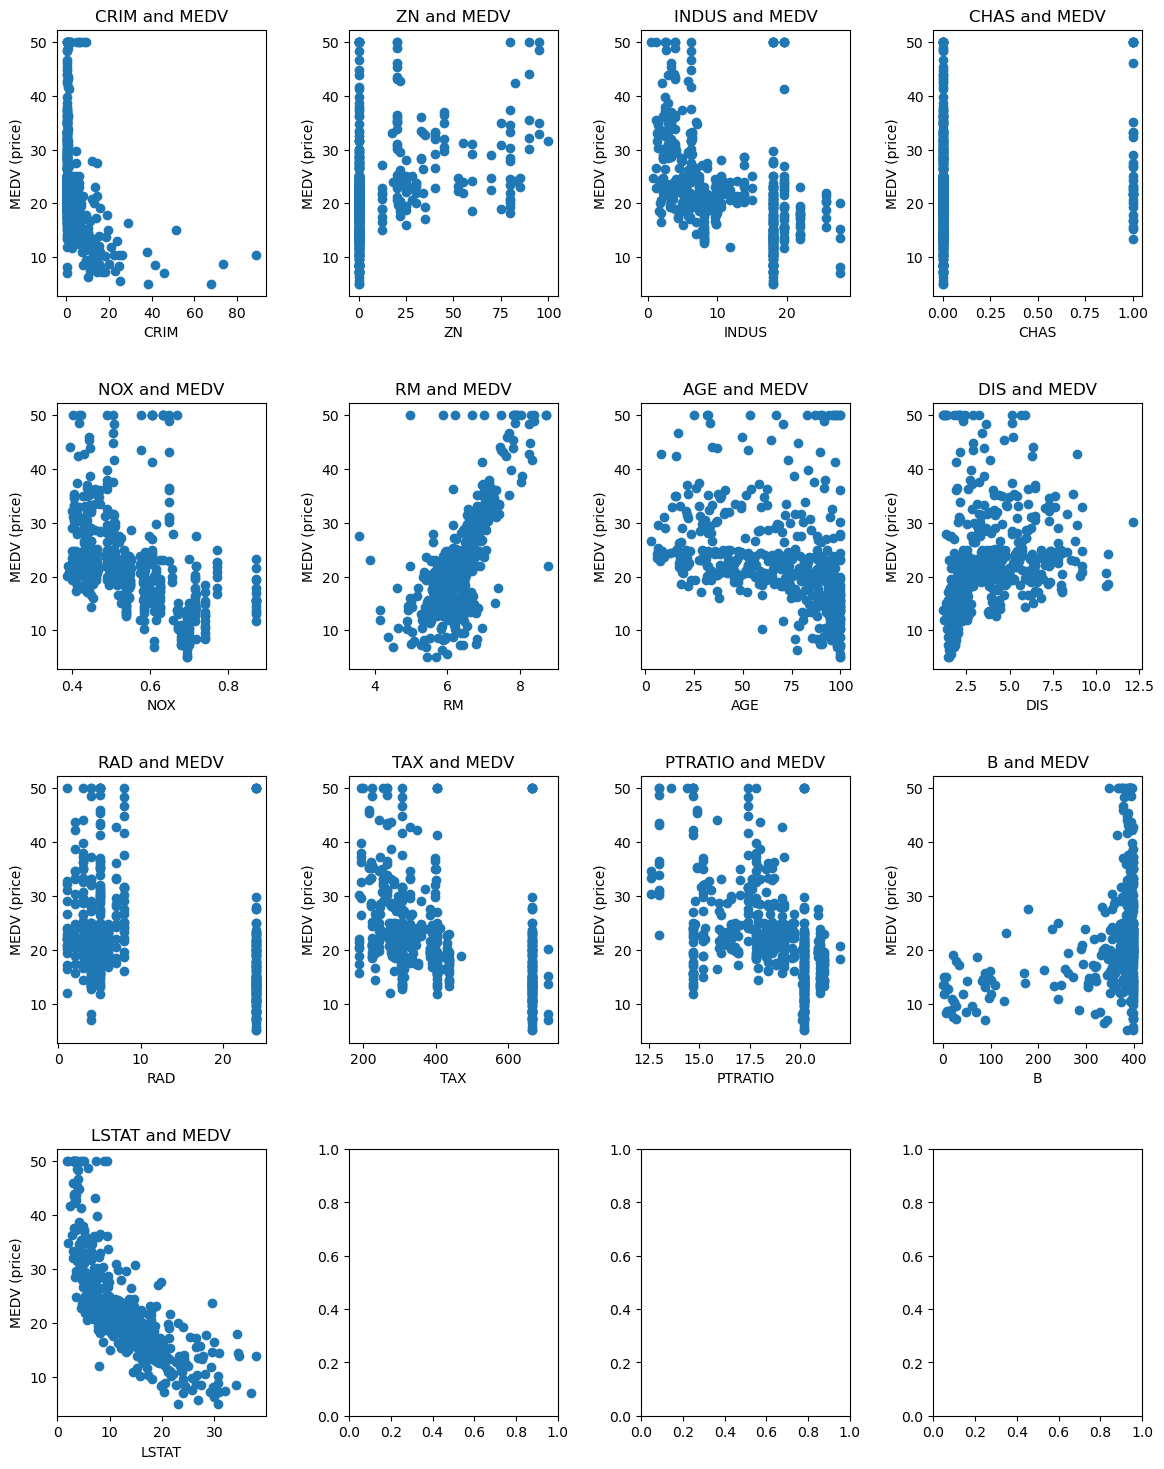

In [6]:
# 1 how does each feature relate to the price
import matplotlib.pyplot as plt
plt.figure()
fig,axes = plt.subplots(4, 4, figsize=(14,18))
fig.subplots_adjust(wspace=.4, hspace=.4)
img_index = 0
for i in range(len(feature_names)):
    row, col = i // 4, i % 4
    axes[row][col].scatter(feature[:,i], price)
    axes[row][col].set_title(feature_names[i] + ' and MEDV')
    axes[row][col].set_xlabel(feature_names[i])        
    axes[row][col].set_ylabel('MEDV (price)')
plt.show()

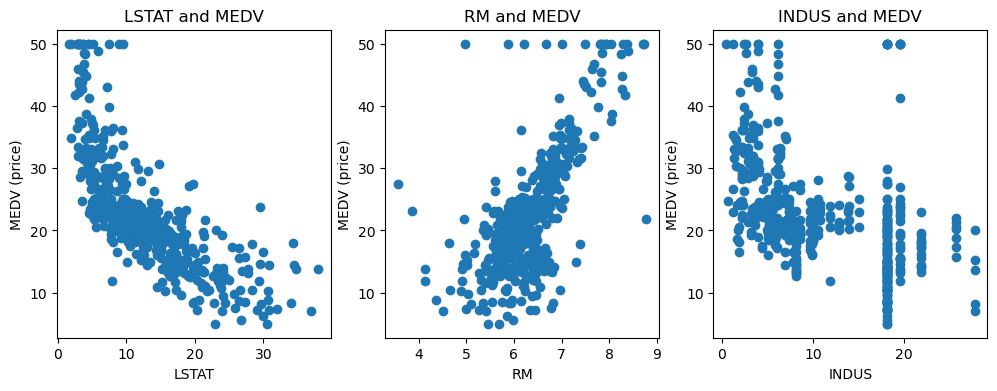

In [7]:
# calculate pearson coefficient between each feature and the price
# omg I didn't notice the next part is exactly pearson correlation. Plz just ignore this part.
from math import *

def pearson(x, y):
    x_c = x - np.mean(x)
    y_c = y - np.mean(y)
    score = np.dot(x_c, y_c)
    score = score / sqrt(np.dot(x_c, x_c) * np.dot(y_c, y_c))
    return score

scores = {}
for i in range(len(feature_names)):
    score = abs(pearson(feature[:, i], price))
    scores[feature_names[i]] = score

#top3 = sorted(scores.keys(), key = lambda x : scores[x], reverse = True)[:3]
top3 = ['LSTAT', 'RM', 'INDUS']
fig,axes = plt.subplots(1, 3, figsize=(12,4), squeeze = False)
for i in range(3):
    j = feature_names.index(top3[i])
    axes[0][i].scatter(feature[:,j], price)
    axes[0][i].set_title(feature_names[j] + ' and MEDV')
    axes[0][i].set_xlabel(feature_names[j])        
    axes[0][i].set_ylabel('MEDV (price)')
plt.show()

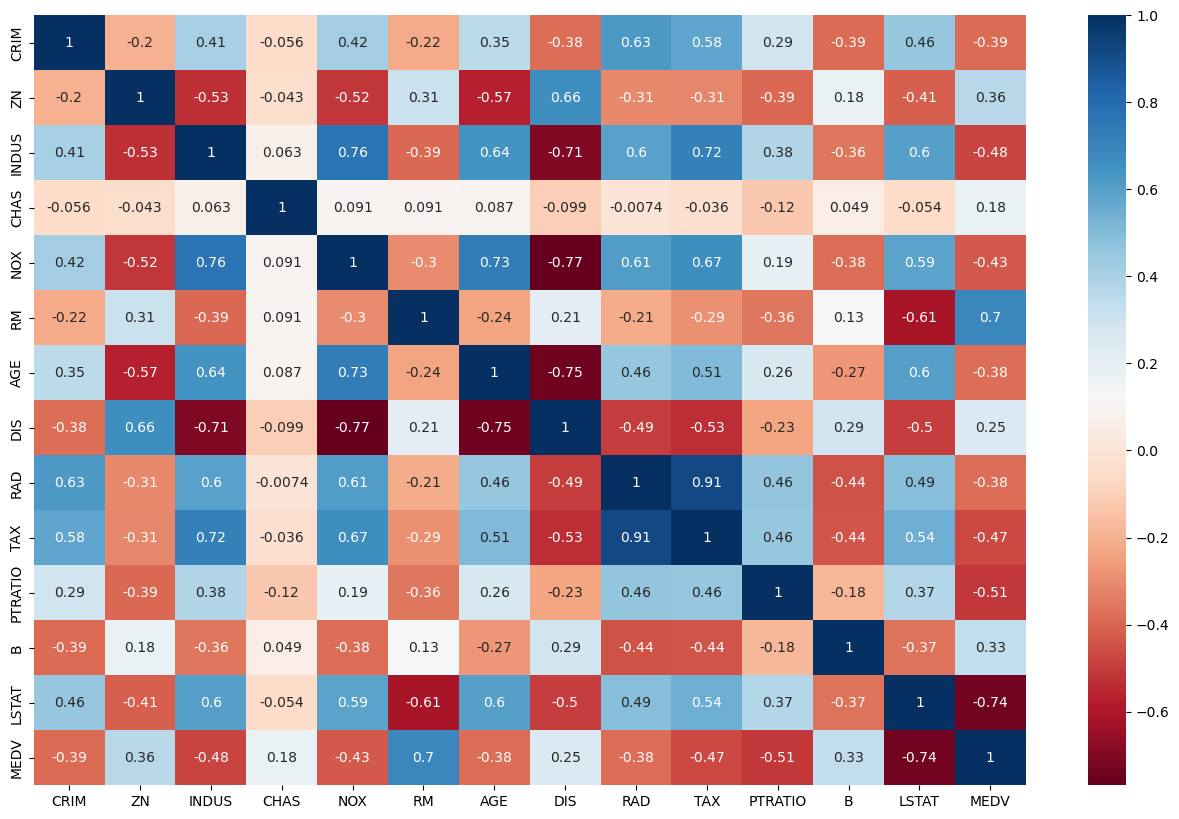

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [8]:
# 2 correlation matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 10))
correlation = df_boston.corr()
sns.heatmap(correlation, annot = True, cmap = 'RdBu')
plt.show()
correlation

In [9]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.3, random_state=8)

In [10]:
# 3 linear regression and ridge regression
import numpy as np
from numpy.linalg import inv

def least_square(X, y):
    #TODO

    theta = np.matmul(X.T, y)
    theta = np.matmul(inv(np.matmul(X.T, X)), theta)
    return theta


def ridge_reg(X, y, eta):
    #TODO

    d = X.shape[1]
    theta = 2 * np.matmul(X.T, y)
    theta = np.matmul(inv(2 * np.matmul(X.T, X) + eta * np.identity(d)), theta)
    return theta

# apply linear regression
theta = least_square(X_train, y_train)
df_theta = pd.DataFrame(zip(feature_names, theta),columns=['Feature','Coeff'])
print(df_theta)

# apply ridge regression
theta_r = ridge_reg(X_train, y_train, 90.0)
df_theta_r = pd.DataFrame(zip(feature_names, theta_r),columns=['Feature','Coeff'])
print(df_theta_r)

    Feature     Coeff
0      CRIM -0.099324
1        ZN  0.052251
2     INDUS  0.004516
3      CHAS  2.957261
4       NOX  1.127938
5        RM  5.854198
6       AGE -0.014957
7       DIS -0.920844
8       RAD  0.159519
9       TAX -0.008934
10  PTRATIO -0.435674
11        B  0.014905
12    LSTAT -0.474751
    Feature     Coeff
0      CRIM -0.101484
1        ZN  0.064642
2     INDUS  0.020644
3      CHAS  1.107609
4       NOX  0.287127
5        RM  5.008160
6       AGE  0.006178
7       DIS -0.770484
8       RAD  0.162159
9       TAX -0.008670
10  PTRATIO -0.260870
11        B  0.017465
12    LSTAT -0.534369


In [11]:
# 4 evaluation
def pred_fn(X, theta):
    #TODO
    pred = np.matmul(X, theta)
    return pred

def root_mean_square_error(pred, y):
    #TODO
    n = y.shape[0]
    rmse = np.sqrt(np.dot(y - pred, y - pred) / n)
    return rmse

pred_train = pred_fn(X_train, theta)
rmse_train = root_mean_square_error(pred_train, y_train)
print(f'train rmse in linear regression: {rmse_train}')

pred_test = pred_fn(X_test, theta)
rmse_test = root_mean_square_error(pred_test, y_test)
print(f'test rmse in linear regression: {rmse_test}')

pred_train_r = pred_fn(X_train, theta_r)
rmse_train_r = root_mean_square_error(pred_train_r, y_train)
print(f'train rmse in ridge regression: {rmse_train_r}')

pred_test_r = pred_fn(X_test, theta_r)
rmse_test_r = root_mean_square_error(pred_test_r, y_test)
print(f'test rmse in ridge regression: {rmse_test_r}')

train rmse in linear regression: 4.820626531838223
test rmse in linear regression: 5.2092175105308245
train rmse in ridge regression: 4.907585485435812
test rmse in ridge regression: 5.212803258366068


In [12]:
# 5 linear models of top-3 features
# linear regression using top-3 features
    #TODO
top3 = ['LSTAT', 'RM', 'PTRATIO']
mask = [feature_names.index(each) for each in top3]
X_train_clipped = X_train[:, mask]
X_test_clipped = X_test[:, mask]

theta_clipped = least_square(X_train_clipped, y_train)
print(theta_clipped)
# ridge regression using top-3 features
    #TODO
theta_r_clipped = ridge_reg(X_train_clipped, y_train, eta = 45)
print(theta_r_clipped)

pred_train = pred_fn(X_train_clipped, theta_clipped)
rmse_train = root_mean_square_error(pred_train, y_train)
print(f'train rmse in linear regression: {rmse_train}')

pred_test = pred_fn(X_test_clipped, theta_clipped)
rmse_test = root_mean_square_error(pred_test, y_test)
print(f'test rmse in linear regression: {rmse_test}')

pred_train_r = pred_fn(X_train_clipped, theta_r_clipped)
rmse_train_r = root_mean_square_error(pred_train_r, y_train)
print(f'train rmse in ridge regression: {rmse_train_r}')

pred_test_r = pred_fn(X_test_clipped, theta_r_clipped)
rmse_test_r = root_mean_square_error(pred_test_r, y_test)
print(f'test rmse in ridge regression: {rmse_test_r}')

[-0.53627668  6.40590366 -0.59591602]
[-0.56320084  6.03265572 -0.45280675]
train rmse in linear regression: 5.273361751695365
test rmse in linear regression: 5.49472364666459
train rmse in ridge regression: 5.287212317066405
test rmse in ridge regression: 5.465917645767795
